<a href="https://colab.research.google.com/github/Sackllano432/C11A-2/blob/main/1CS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Activities and Case Studies

1. For all activities, you are allowed to collaborate with a partner.
2. For case studies, you should work individually and are **not** allowed to collaborate.

By filling out this notebook and submitting it, you acknowledge that you are aware of the above policies and are agreeing to comply with them.

# Case Study 1: Python and Data Fundamentals with Titanic Dataset

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore datasets using pandas DataFrames
- Handle missing data and perform basic data cleaning
- Use boolean indexing to filter data
- Apply groupby operations to analyze patterns
- Create new features through feature engineering
- Visualize data to gain insights

## 📚 Prerequisites
- Basic Python syntax (variables, functions, loops)
- Understanding of Python data types (lists, dictionaries)
- Familiarity with Jupyter notebooks

## ⏱️ Estimated Time: 2-3 hours

## 🚀 Getting Started
In this case study, we'll explore one of the most famous datasets in machine learning: the Titanic passenger data. You'll practice essential data manipulation techniques that form the foundation of machine learning workflows. These skills - data cleaning, exploration, and feature engineering - typically take up 80% of a machine learning engineer's time!

**Why Titanic?** This dataset is perfect for learning because it has:
- A mix of numerical and categorical data
- Real-world messiness (missing values)
- Interesting patterns to discover
- A compelling story behind the data

Let's begin our journey into machine learning!

In [1]:
# Import all necessary libraries for our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style for better-looking visualizations
plt.style.use("ggplot")
sns.set_palette("husl")

## Understanding Data Structures in Python

Before a Machine Learning engineer can start training models, they have to gather data from scattered sources and manipulate it into a shape that models can work with. Preprocessing messy real-life data is often one of the most time-consuming things an ML engineer has to do. Fortunately, there are a number of open-sourced, powerful tools out there for working with (potentially large amounts of) data for Machine Learning.

Your core tools will generally be basic dictionaries, numpy arrays, and pandas. Each has their own strengths and weaknesses. Most of the time, however, you can use the simplest data structure that satisfies your needs:

1. **Python Dictionaries/Lists** → Simple lookups, heterogeneous data, small datasets. We're generally going to be doing much more advanced, math-involved work than dictionaries can handle, but you shouldn't discount them; they're often the easiest and most performant option for simple lookups or situations where you're constantly adding and looking up items.
2. **NumPy Arrays** → Numerical computations, homogeneous data, mathematical operations, and very structured data. Numpy is very fast at crunching matrices and performing linear algebra operations, and stores data in single- or multi-dimensional arrays (also known as tensors). However, it doesn't work as well on mixed/messy data (with many datatypes, missing data, etc.), and it's less of a swiss-army knife when it comes to complex operations.
3. **Pandas DataFrames/Series** → Data manipulation, labeled data, mixed data types, file I/O, data analysis workflows. Pandas is the most capable of the listed tools when it comes to handling real-world data, and largely builds on numpy with additional complex functionality like joins, pivots, cuts, groups - all sorts of fun things you'll soon learn.

There are many other tools you may find in the wild that are more powerful for specific/large tasks. One honorable mention that you won't see again in this course: [Polars](https://docs.pola.rs/), a very performant derivative of Pandas. I mention it here only so you know the name; Pandas might be the de-facto standard tool, but it's also single-threaded and has to hold your entire dataset in memory. If you run into performance issues with large datasets, you might want to explore Polars as an alternative.

*Note: We'll focus primarily on pandas in this assignment since it's designed for the type of data analysis work you'll be doing in machine learning. The skills you learn here will largely transfer to whichever tool you select*

## Question 1: Dataset Introduction and Basic Operations

### Loading and Exploring the Titanic Dataset

The Titanic dataset contains real passenger information from the tragic 1912 voyage. It provides an excellent learning opportunity with a rich mix of categorical and numerical variables, plus the realistic missing data challenges you'll encounter in real-world machine learning projects.

Let's start by loading our data and getting familiar with its structure.

In [2]:
# Load the Titanic dataset
titanic = pd.read_csv("titanic.csv")

# Display the first few rows to understand our data structure
print("First 5 rows of the Titanic dataset:")
print(titanic.head())

print("\n" + "="*80)
print("📖 DATA DICTIONARY - Understanding Our Columns:")
print("="*80)
print("""
- pclass: Passenger Class (1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower)
- survived: Survival (0 = No, 1 = Yes) - This is what ML models would predict!
- name: Passenger name
- sex: Gender (male/female)
- age: Age in years
- sibsp: Number of siblings/spouses aboard
- parch: Number of parents/children aboard
- ticket: Ticket number
- fare: Passenger fare (price paid for ticket)
- cabin: Cabin number
- embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- boat: Lifeboat number (if survived)
- body: Body identification number (if died and body was recovered)
- home.dest: Home/destination
""")

First 5 rows of the Titanic dataset:
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  


### Initial Data Exploration

Let's explore the basic characteristics of our dataset. Understanding the shape, data types, and basic statistics is always the first step in any data analysis project.

In [3]:
# Get basic information about the dataset
print("Dataset shape (rows, columns):", titanic.shape)
print("\nColumn names and data types:")
print(titanic.dtypes)

Dataset shape (rows, columns): (1309, 14)

Column names and data types:
pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


In [4]:
# Get detailed information about the dataset
print("Detailed dataset information:")
titanic.info()

Detailed dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


You might have spotted the "RangeIndex" in the output. Indices are a core and powerful part of the Pandas library, allowing for fast lookups and data alignment. A RangeIndex is a special case that isn't actually stored in memory. Just like the python `range(...)` function, it represents the range with just a start, stop, and step value, and just numbers the rows in your table.

We won't go into much more detail on indices here, but know that they're very useful, especially when doing complicated things like SQL-like joins efficiently.

In [5]:
# Get descriptive statistics for numerical columns
print("Descriptive statistics for numerical columns:")
titanic.describe()

Descriptive statistics for numerical columns:


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### Your Turn: Extracting Information from Data Exploration

Now it's your turn to extract specific information from the dataset. Look at the output from `.describe()` above to answer this question.

In [8]:
# Based on the .describe() output above, what is the mean age of passengers?
# Store this value in the variable age_description (as a float, rounded to 2 decimal places)

# YOUR CODE HERE
# raise NotImplementedError()
age_description = 29.88

print(f"Mean age of passengers: {age_description}")

Mean age of passengers: 29.88


In [9]:
# Test that age_description contains the correct mean age
import math
expected_mean_age = titanic["age"].mean()
assert isinstance(age_description, float), "age_description should be a float"
assert math.isclose(age_description, expected_mean_age, abs_tol=0.01), f"Expected {expected_mean_age:.2f}, got {age_description}"

### Switching to Numpy

Did we mention Numpy and Pandas have a lot in common? You can easily convert between the two using built-in functions.

Specifically, the Pandas `Series` object represents a single column of data along with some metadata, an index, and a datatype. It's basically a numpy array with some extra spice on top. You can convert a Pandas Series to a NumPy array using the `.values` attribute or the `.to_numpy()` method. Conversely, you can create a Pandas Series from a NumPy array by passing it to the `pd.Series()` constructor.

In [10]:
# Example: Create a Series by selecting a single column
example_series = titanic["name"]  # Using a different column for the example
print("Type of example_series:", type(example_series))
print("First 3 values:")
print(example_series.head(3))

Type of example_series: <class 'pandas.core.series.Series'>
First 3 values:
0     Allen, Miss. Elisabeth Walton
1    Allison, Master. Hudson Trevor
2      Allison, Miss. Helen Loraine
Name: name, dtype: object


In [11]:
# Example: Convert fare column to a NumPy array
example_array = titanic["fare"].to_numpy()  # Using a different column for the example
print("Type of example_array:", type(example_array))
print("First 5 values:", example_array[:5])
print("Shape:", example_array.shape)

Type of example_array: <class 'numpy.ndarray'>
First 5 values: [211.3375 151.55   151.55   151.55   151.55  ]
Shape: (1309,)


### Your Turn: Creating Different Data Structures

Practice creating Series and NumPy arrays from our DataFrame columns.

In [12]:
# Access a Series from the "sex" column and store it in sex_series
# Create a NumPy array from the "age" column and store it in age_array

# YOUR CODE HERE
#raise NotImplementedError()

# sex series
sex_series = titanic["sex"]
print("Type of sex_series:", type(sex_series))
print("First 3 values:")
print(sex_series.head(3))

# age array
age_array = titanic["age"].to_numpy()
print("Type of age_array:", type(age_array))
print("First 5 values:", age_array[:5])
print("Shape:", age_array.shape)

Type of sex_series: <class 'pandas.core.series.Series'>
First 3 values:
0    female
1      male
2    female
Name: sex, dtype: object
Type of age_array: <class 'numpy.ndarray'>
First 5 values: [29.    0.92  2.   30.   25.  ]
Shape: (1309,)


In [13]:
# Test that the variables have correct types
assert isinstance(sex_series, pd.Series), "sex_series should be a pandas Series"
assert isinstance(age_array, np.ndarray), "age_array should be a numpy ndarray"

### Data Cleaning and Missing Values

Real datasets are messy! One frequent problem is missing data, where some values are not recorded. In pandas, these are represented as Na (Not Available). This is the equivalent to None in normal Python and NaN in numpy.

Let's identify where we have missing data and make informed decisions about how to handle it.

Also notice a common trick here: isna() returns a boolean for each item (called a boolean mask) indicating whether that item is Na or not. We can `sum` these booleans to count the number of `True`s because `True` is equivalent to 1 and `False` is equivalent to 0.

In [14]:
# Check for missing values across all columns
missing_counts = titanic.isna().sum()
print("Missing values by column:")
print(missing_counts)

Missing values by column:
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


### Making Data Cleaning Decisions

Real-world data is messy! Let's clean our dataset step by step.

**🔍 What we found:**
- `age` has 263 missing values (20% of passengers!)
- `cabin` has 1014 missing values (77% missing - too many to be useful)
- `fare` has 1 missing value
- `embarked` has 2 missing values

**🎯 Our cleaning strategy:**
1. **Remove incomplete records**: Drop rows missing age, fare, OR embarked (we need all for analysis)
2. **Select relevant columns**: Keep only the columns useful for our analysis

**⚠️ Important ML Context:** In machine learning, handling missing data is crucial. Today we're using the simplest approach (dropping rows), but in future assignments you'll learn about *imputation* - inferring missing values from patterns in the data.

**Your task:**
1. Drop rows where `age`, `fare`, or `embarked` is missing (NA/NaN)
2. Then select only the columns in `subset_cols`

💡 **Hints:**
- Use `dropna(subset=['col1', 'col2', 'col3'])` to drop rows with NA in specific columns
- Use `df[column_list]` to select specific columns
- You can chain operations: `df.operation1().operation2()`

In [15]:
# Question: Data Cleaning with Column Selection

# Given the titanic DataFrame, drop all rows with missing values in age, fare, or embarked,
# then select only the columns listed in subset_cols and assign the result to titanic_clean.

# Provided variable:
subset_cols = ["survived", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
titanic_clean = pd.DataFrame()

# YOUR CODE HERE
# raise NotImplementedError()
if "age" in titanic.columns and "fare" in titanic.columns and "embarked" in titanic.columns:
    titanic_clean = titanic.dropna(subset=["age", "fare", "embarked"])[subset_cols]

print(f"Rows after cleaning: {len(titanic_clean)}")
print("Columns:", titanic_clean.columns.tolist())

Rows after cleaning: 1043
Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']


In [16]:
# Test that data cleaning was done correctly
assert isinstance(titanic_clean, pd.DataFrame), "titanic_clean should be a DataFrame"
assert len(titanic_clean) > 1000, f"Expected more than 1000 rows after cleaning, got {len(titanic_clean)}"
assert len(titanic_clean) < 1050, f"Expected less than 1050 rows after cleaning, got {len(titanic_clean)}"

# Check that required columns are present
required_cols = ["survived", "pclass", "sex", "age", "fare"]
for col in required_cols:
    assert col in titanic_clean.columns, f"Column '{col}' should be in titanic_clean"

# Check no missing values in key columns
assert titanic_clean["age"].isna().sum() == 0, "Age column should have no missing values"
assert titanic_clean["fare"].isna().sum() == 0, "Fare column should have no missing values"

## 🛠️ Quick Debugging Tips
Before we continue, here are essential debugging techniques for pandas:

```python
# Check your dataframe's shape (rows, columns)
print(df.shape)

# See first few rows
print(df.head())

# Check data types and missing values
print(df.info())

# Get column names
print(df.columns.tolist())

# Check for missing values
print(df.isna().sum())

# See unique values in a column
print(df['column_name'].unique())
```

**Common Errors and Solutions:**
- `KeyError: 'column_name'` → Check column exists with `df.columns`
- `AttributeError` → Check variable type with `type(variable)`
- Unexpected results → Print intermediate steps to debug

---

## Question 2: Boolean Indexing and Filtering

### Creating Boolean Masks and Filters

**Core Concept**: Boolean indexing is fundamental to data analysis - you'll use this constantly in ML preprocessing and exploratory analysis!

**🤖 ML Connection:** Boolean masks are how you'll separate training and test data, filter outliers, and select specific subgroups for analysis.

Boolean indexing works by creating a "mask" of True/False values that corresponds to each row in your DataFrame. Only rows with True values are selected.

In [17]:
# Create and understand boolean masks
female_mask = titanic_clean["sex"] == "female"
print(f"Mask type: {type(female_mask)}")
print(f"Mask shape: {female_mask.shape}")
print("First 10 mask values:")
print(female_mask.head(10))

Mask type: <class 'pandas.core.series.Series'>
Mask shape: (1043,)
First 10 mask values:
0     True
1    False
2     True
3    False
4     True
5    False
6     True
7    False
8     True
9    False
Name: sex, dtype: bool


### Your Turn: Creating Boolean Masks and Filters

Practice creating your own boolean masks and applying them to filter data.

**📝 Task Breakdown:**
1. Create a boolean mask for elderly passengers (age > 60)
2. Create a filtered DataFrame of young passengers (age < 18)

**💡 Helpful Examples:**
```python
# Example: Creating a boolean mask
mask = df['column'] > value  # Returns Series of True/False

# Example: Using a mask to filter
filtered_df = df[df['column'] < value]  # Returns filtered DataFrame
```

**🎯 Remember:**
- A mask is just a Series of True/False values
- Apply a mask using `df[mask]` to get filtered rows

In [18]:
# Create elderly_mask: Boolean mask for passengers older than 60
# Create young_passengers: DataFrame of passengers under 18 years old

# YOUR CODE HERE
# raise NotImplementedError()
elderly_mask = titanic_clean["age"] > 60
young_passengers = titanic_clean[titanic_clean["age"] < 18]

print(f"Number of elderly passengers (>60): {elderly_mask.sum()}")
print(f"Number of young passengers (<18): {len(young_passengers)}")

Number of elderly passengers (>60): 31
Number of young passengers (<18): 154


In [19]:
# Test elderly_mask and young_passengers
assert 'elderly_mask' in locals(), "elderly_mask variable should be defined"
assert 'young_passengers' in locals(), "young_passengers variable should be defined"

# elderly_mask should be a boolean Series with True where age > 60
assert elderly_mask.dtype == bool, "elderly_mask should be a boolean Series"
assert len(elderly_mask) == len(titanic_clean), "elderly_mask should have the same length as titanic_clean"
assert elderly_mask.sum() == 31, "elderly_mask should have 31 True values (elderly passengers)"

# young_passengers should be a DataFrame with only passengers under 18
assert isinstance(young_passengers, pd.DataFrame), "young_passengers should be a DataFrame"
assert (young_passengers["age"] < 18).all(), "All ages in young_passengers should be < 18"
assert len(young_passengers) == 154, "young_passengers should have 154 rows"

## Question 3: Groupby Operations and Analysis

### Introduction to Groupby Operations

Groupby is one of the most powerful features in pandas, allowing you to split your data into groups and apply calculations to each group. Think of it as answering questions like "What's the average age BY passenger class?" or "What's the survival rate BY gender?"

**🤖 ML Connection:** Groupby operations help you:
- Discover patterns that could become features for your ML models
- Identify class imbalances (e.g., more survivors in 1st class)
- Create aggregate features (e.g., average fare by class)
- Validate assumptions about your data

Let's see it in action!

In [20]:
# Basic groupby: survival rates by passenger class
survival_by_class = titanic_clean.groupby("pclass")["survived"].mean()
print("Survival rate by passenger class:")
print(survival_by_class)
print(f"\nNote: 1 = 100% survival, 0 = 0% survival for that group")

Survival rate by passenger class:
pclass
1    0.634752
2    0.440613
3    0.262000
Name: survived, dtype: float64

Note: 1 = 100% survival, 0 = 0% survival for that group


### 📚 Optional: Advanced Multi-level Grouping

**Note:** This section is optional for curious students. Feel free to skip to the next "Your Turn" section if you prefer!

Notice how the index became the column we grouped by? You can also group by multiple columns, which will return a "multi-level index" with multiple columns in it. This is a powerful feature but can be complex for beginners.

In [21]:
# Group by both 'pclass' and 'sex', then calculate the mean survival rate for each group
survival_by_class_and_sex = titanic_clean.groupby(['pclass', 'sex'])['survived'].mean()
print("Survival rate by passenger class and sex:")
print(survival_by_class_and_sex)

print("\nThis index is multi-level")
print(survival_by_class_and_sex.index)
# You can use the .loc accessor to select from the first level of the index, maintaining the second level.
print("\nSurvival rates for 1st class by sex:")
print(survival_by_class_and_sex.loc[1])

# You can also just flatten the index into tuples
print("\nI hate levels! Make it flat!")
print(survival_by_class_and_sex.index.to_flat_index())

Survival rate by passenger class and sex:
pclass  sex   
1       female    0.961832
        male      0.350993
2       female    0.893204
        male      0.145570
3       female    0.473684
        male      0.169540
Name: survived, dtype: float64

This index is multi-level
MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['pclass', 'sex'])

Survival rates for 1st class by sex:
sex
female    0.961832
male      0.350993
Name: survived, dtype: float64

I hate levels! Make it flat!
Index([(1, 'female'),   (1, 'male'), (2, 'female'),   (2, 'male'),
       (3, 'female'),   (3, 'male')],
      dtype='object')


### Your Turn: Groupby Operations

Practice creating your own groupby analyses to understand passenger patterns.

In [22]:
# Create avg_age_by_class: Series showing average age by passenger class
# Create survival_by_sex: Series showing survival rate by sex

# YOUR CODE HERE
# raise NotImplementedError()
avg_age_by_class = titanic_clean.groupby("pclass")["age"].mean()
survival_by_sex = titanic_clean.groupby("sex")["survived"].mean()

print("Average age by passenger class:")
print(avg_age_by_class)
print("\nSurvival rate by sex:")
print(survival_by_sex)

Average age by passenger class:
pclass
1    39.083050
2    29.506705
3    24.745000
Name: age, dtype: float64

Survival rate by sex:
sex
female    0.751295
male      0.205479
Name: survived, dtype: float64


In [23]:
# Test groupby operations
assert 'avg_age_by_class' in locals(), "avg_age_by_class variable should be defined"
assert 'survival_by_sex' in locals(), "survival_by_sex variable should be defined"

# Test avg_age_by_class
assert isinstance(avg_age_by_class, pd.Series), "avg_age_by_class should be a pandas Series"
assert len(avg_age_by_class) == 3, "avg_age_by_class should have 3 values (one for each class)"
assert all(avg_age_by_class.index == [1, 2, 3]), "avg_age_by_class index should be [1, 2, 3]"
assert avg_age_by_class[1] > avg_age_by_class[3], "First class should have higher average age than third class"

# Test survival_by_sex
assert isinstance(survival_by_sex, pd.Series), "survival_by_sex should be a pandas Series"
assert len(survival_by_sex) == 2, "survival_by_sex should have 2 values (male and female)"
assert set(survival_by_sex.index) == {"male", "female"}, "survival_by_sex index should contain 'male' and 'female'"
assert 0 <= survival_by_sex["male"] <= 1, "Male survival rate should be between 0 and 1"
assert 0 <= survival_by_sex["female"] <= 1, "Female survival rate should be between 0 and 1"
assert survival_by_sex["female"] > survival_by_sex["male"], "Female survival rate should be higher than male"

### ✅ Checkpoint: What We've Learned So Far

Great job! Let's recap what you've mastered:

1. **Data Exploration**: Used `.head()`, `.info()`, `.describe()` to understand data
2. **Data Cleaning**: Handled missing values with `.dropna()`
3. **Boolean Indexing**: Created masks to filter specific rows
4. **Groupby Operations**: Calculated statistics by groups

**Quick Self-Check:** Can you explain why 1st class passengers had higher survival rates? (Hint: Think about the insights from your groupby analysis!)

---

## Question 4: Feature Engineering and Transformations

### Creating New Columns and Feature Engineering

Feature engineering - creating new variables from existing ones - is where machine learning becomes an art! You're creating information that helps ML models understand patterns better.

**🤖 ML Connection:** Feature engineering can be the difference between a mediocre model (60% accuracy) and a great one (90% accuracy)! The features you create capture domain knowledge and relationships that raw data might not show clearly.

**Common Feature Engineering Techniques:**
- **Combining features**: family_size = sibsp + parch + 1
- **Binning**: age_group = "child", "adult", "elderly"
- **Boolean flags**: is_alone, has_cabin, is_child
- **Interactions**: class_gender = combining class and gender

Let's create some features that might help predict survival!

In [24]:
# Create a new column for family size
titanic_clean["family_size"] = titanic_clean["sibsp"] + titanic_clean["parch"] + 1

print("Family size distribution:")
print(titanic_clean["family_size"].value_counts().sort_index())

# Analyze survival by family size
family_survival = titanic_clean.groupby("family_size")["survived"].mean()
print("\nSurvival rate by family size:")
print(family_survival)

Family size distribution:
family_size
1     587
2     206
3     144
4      39
5      17
6      25
7      16
8       8
11      1
Name: count, dtype: int64

Survival rate by family size:
family_size
1     0.316865
2     0.548544
3     0.562500
4     0.769231
5     0.352941
6     0.200000
7     0.250000
8     0.000000
11    0.000000
Name: survived, dtype: float64


### Your Turn: Creating Boolean Features

Practice creating a boolean feature that might be relevant for survival analysis.

In [25]:
# Create is_alone: New boolean column indicating if passenger traveled alone (family_size == 1)

# YOUR CODE HERE
# raise NotImplementedError()
titanic_clean["is_alone"] = titanic_clean["family_size"] == 1

print("Traveling alone distribution:")
print(titanic_clean["is_alone"].value_counts())

print("\nSurvival rate by traveling status:")
print(titanic_clean.groupby("is_alone")["survived"].mean())

Traveling alone distribution:
is_alone
True     587
False    456
Name: count, dtype: int64

Survival rate by traveling status:
is_alone
False    0.524123
True     0.316865
Name: survived, dtype: float64


In [26]:
# Test is_alone feature
assert "is_alone" in titanic_clean.columns, "Column 'is_alone' should be created in titanic_clean"
assert titanic_clean["is_alone"].dtype == bool, "'is_alone' column should be boolean type"

# Check values
alone_count = titanic_clean["is_alone"].sum()
assert alone_count == 587, f"Expected 587 passengers traveling alone, got {alone_count}"

# Check logic
assert (titanic_clean["is_alone"] == (titanic_clean["family_size"] == 1)).all(), "is_alone should be True when family_size == 1"

# Check that it affects survival
alone_survival = titanic_clean[titanic_clean["is_alone"]]["survived"].mean()
not_alone_survival = titanic_clean[~titanic_clean["is_alone"]]["survived"].mean()
assert alone_survival < not_alone_survival, "Passengers traveling alone should have lower survival rate"

## Question 5: Exploratory Data Analysis and Visualization

### Distribution Analysis by Survival Status

Now for the fun part: Visualization. Visualization is a *hugely important* part of Machine Learning, and is one of the best tools ML engineers have for extracting understanding from raw data. Spending a little extra time making your visualizations look nice and informative can pay off in a big way. With newer libraries like Seaborn, it's also very easy to make nice-looking visualizations with just a few lines of code.

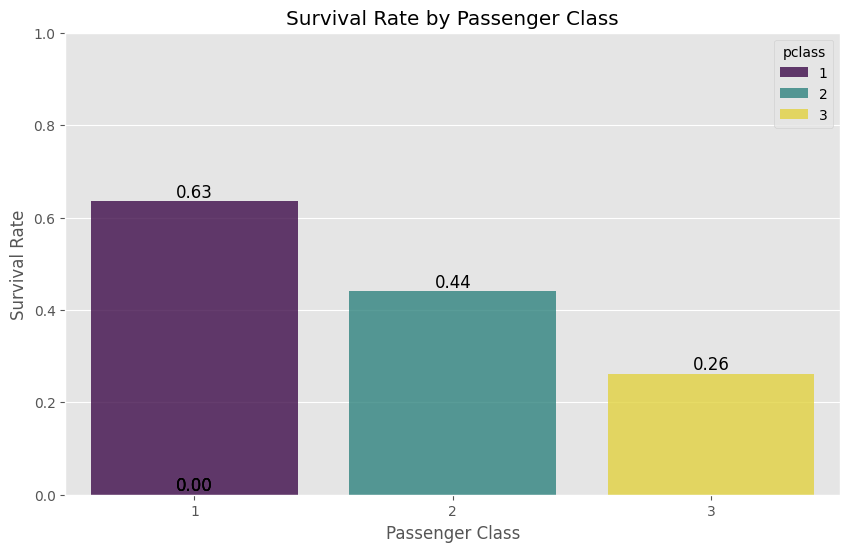

In [27]:
# Bar plot of survival rate by passenger class
plt.figure(figsize=(10, 6))
survival_plot = sns.barplot(data=titanic_clean, x="pclass", hue="pclass", y="survived",
                           palette="viridis", alpha=0.8, errorbar=None)
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.title("Survival Rate by Passenger Class")
plt.ylim(0, 1)
for i, p in enumerate(survival_plot.patches):
    height = p.get_height()
    survival_plot.annotate(f"{height:.2f}",
                          (p.get_x() + p.get_width() / 2, height),
                          ha='center', va='bottom', fontsize=12)
plt.show()

### Your Turn: Creating Group Visualizations

Create visualizations to explore different group comparisons in the data. Let's also use the Matplotlib subplots() function to combine multiple plots into a single figure.

**📊 Your Tasks:**
1. Create a **boxplot** showing age distribution by passenger class
2. Create a **barplot** showing survival rate by sex

**💡 Visualization Tips:**
- Boxplots show distribution: median (line), quartiles (box), outliers (dots)
- Barplots show comparisons between categories
- Always add titles to make your plots understandable!

**🎨 Seaborn Syntax Reminders:**
```python
# Boxplot example:
sns.boxplot(data=df, x="category_column", y="numeric_column", ax=axes[0])

# Barplot example:
sns.barplot(data=df, x="category_column", y="numeric_column", ax=axes[1])
```

Don't forget to add titles using `axes[i].set_title("Your Title")`!

Text(0.5, 1.0, 'Survival Rate by Sex')

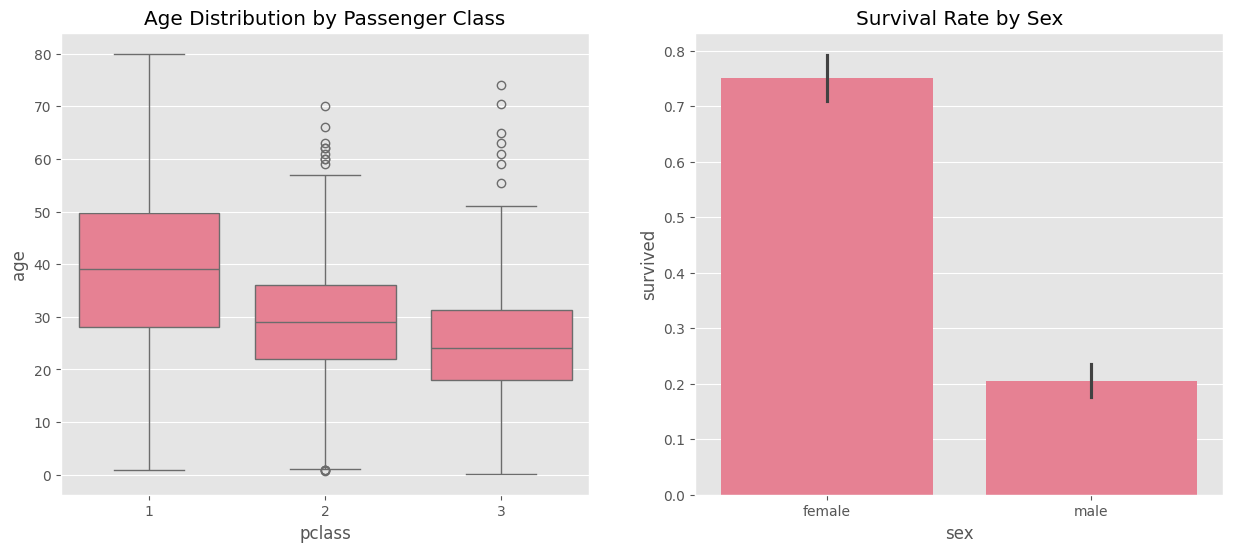

In [31]:
# Under axes[0], Create age_by_class_plot: Box plot showing age distribution by passenger class using seaborn
# Under axes[1], Create survival_by_sex_plot: Bar plot showing survival rate by sex
# Make sure you save the result of the sns.boxplot() and sns.barplot() calls into those variables for grading.
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Hint: the first (boxplot) subplot example will look like this (with columns in place of "?"):
# age_by_class_plot = sns.boxplot(data=titanic_clean, x="?" y="?", ax=axes[0])

# YOUR CODE HERE
# raise NotImplementedError()
age_by_class_plot = sns.boxplot(data=titanic_clean, x="pclass", y="age", ax=axes[0])
survival_by_sex_plot = sns.barplot(data=titanic_clean, x="sex", y="survived", ax=axes[1])

# setting titles
age_by_class_plot.set_title("Age Distribution by Passenger Class")
survival_by_sex_plot.set_title("Survival Rate by Sex")


In [32]:
# Test that the plot variables were created and contain the expected plot data
assert 'age_by_class_plot' in locals(), "age_by_class_plot variable should be created"
assert 'survival_by_sex_plot' in locals(), "survival_by_sex_plot variable should be created"

# Check that the plots are matplotlib/seaborn axes objects
import matplotlib.axes._axes
assert isinstance(age_by_class_plot, matplotlib.axes._axes.Axes), "age_by_class_plot should be a matplotlib Axes object"
assert isinstance(survival_by_sex_plot, matplotlib.axes._axes.Axes), "survival_by_sex_plot should be a matplotlib Axes object"

# Check that plots have titles
assert age_by_class_plot.get_title() != "", "age_by_class_plot should have a title"
assert survival_by_sex_plot.get_title() != "", "survival_by_sex_plot should have a title"

# Check x-axis labels exist and are reasonable
age_x_labels = [tick.get_text() for tick in age_by_class_plot.get_xticklabels()]
survival_x_labels = [tick.get_text() for tick in survival_by_sex_plot.get_xticklabels()]

# Basic check that labels exist
assert len(age_x_labels) > 0, "age_by_class_plot should have x-axis labels"
assert len(survival_x_labels) > 0, "survival_by_sex_plot should have x-axis labels"

## Summary and Reflection

Congratulations! You've completed a comprehensive exploration of the Titanic dataset using fundamental pandas operations and data visualization techniques.

### 🎉 What You've Accomplished:
- ✅ Loaded and explored real-world data
- ✅ Cleaned messy data by handling missing values
- ✅ Used boolean indexing to filter data
- ✅ Discovered patterns with groupby operations
- ✅ Created new features through engineering
- ✅ Visualized data to communicate insights

These are the EXACT skills you'll use in every machine learning project!

---

## 🌟 Bonus Challenges (Optional)

For those who finish early or want extra practice:

### Challenge 1: Investigate Fare Patterns
```python
# Can you find out:
# - What was the average fare for each embarkation port?
# - Did port of embarkation affect survival rate?
```

### Challenge 2: Title Extraction
```python
# Extract titles from passenger names (Mr., Mrs., Miss., etc.)
# Hint: Names are formatted as "Last, Title. First"
# Does title correlate with survival?
```

### Challenge 3: Age Groups
```python
# Create age groups: Child (0-12), Teen (13-19), Adult (20-59), Senior (60+)
# Which age group had the highest survival rate?
```

### Challenge 4: Cabin Deck Analysis
```python
# Extract the deck letter from cabin numbers (e.g., "C85" → "C")
# Did cabin deck affect survival? (Hint: Higher decks = closer to lifeboats)
```

---

**Feedback is heavily encouraged** - please comment on your submission with anything you found confusing or any suggestions for improvement!